In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/adult.csv')

In [3]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df = df.replace('?',np.NaN)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
df = df.dropna(axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
df['income'].value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [7]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

In [8]:
df['income'].value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [9]:
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

In [10]:
df_str.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [11]:
df_int.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
df_str = pd.get_dummies(df_str)

In [13]:
df_str.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


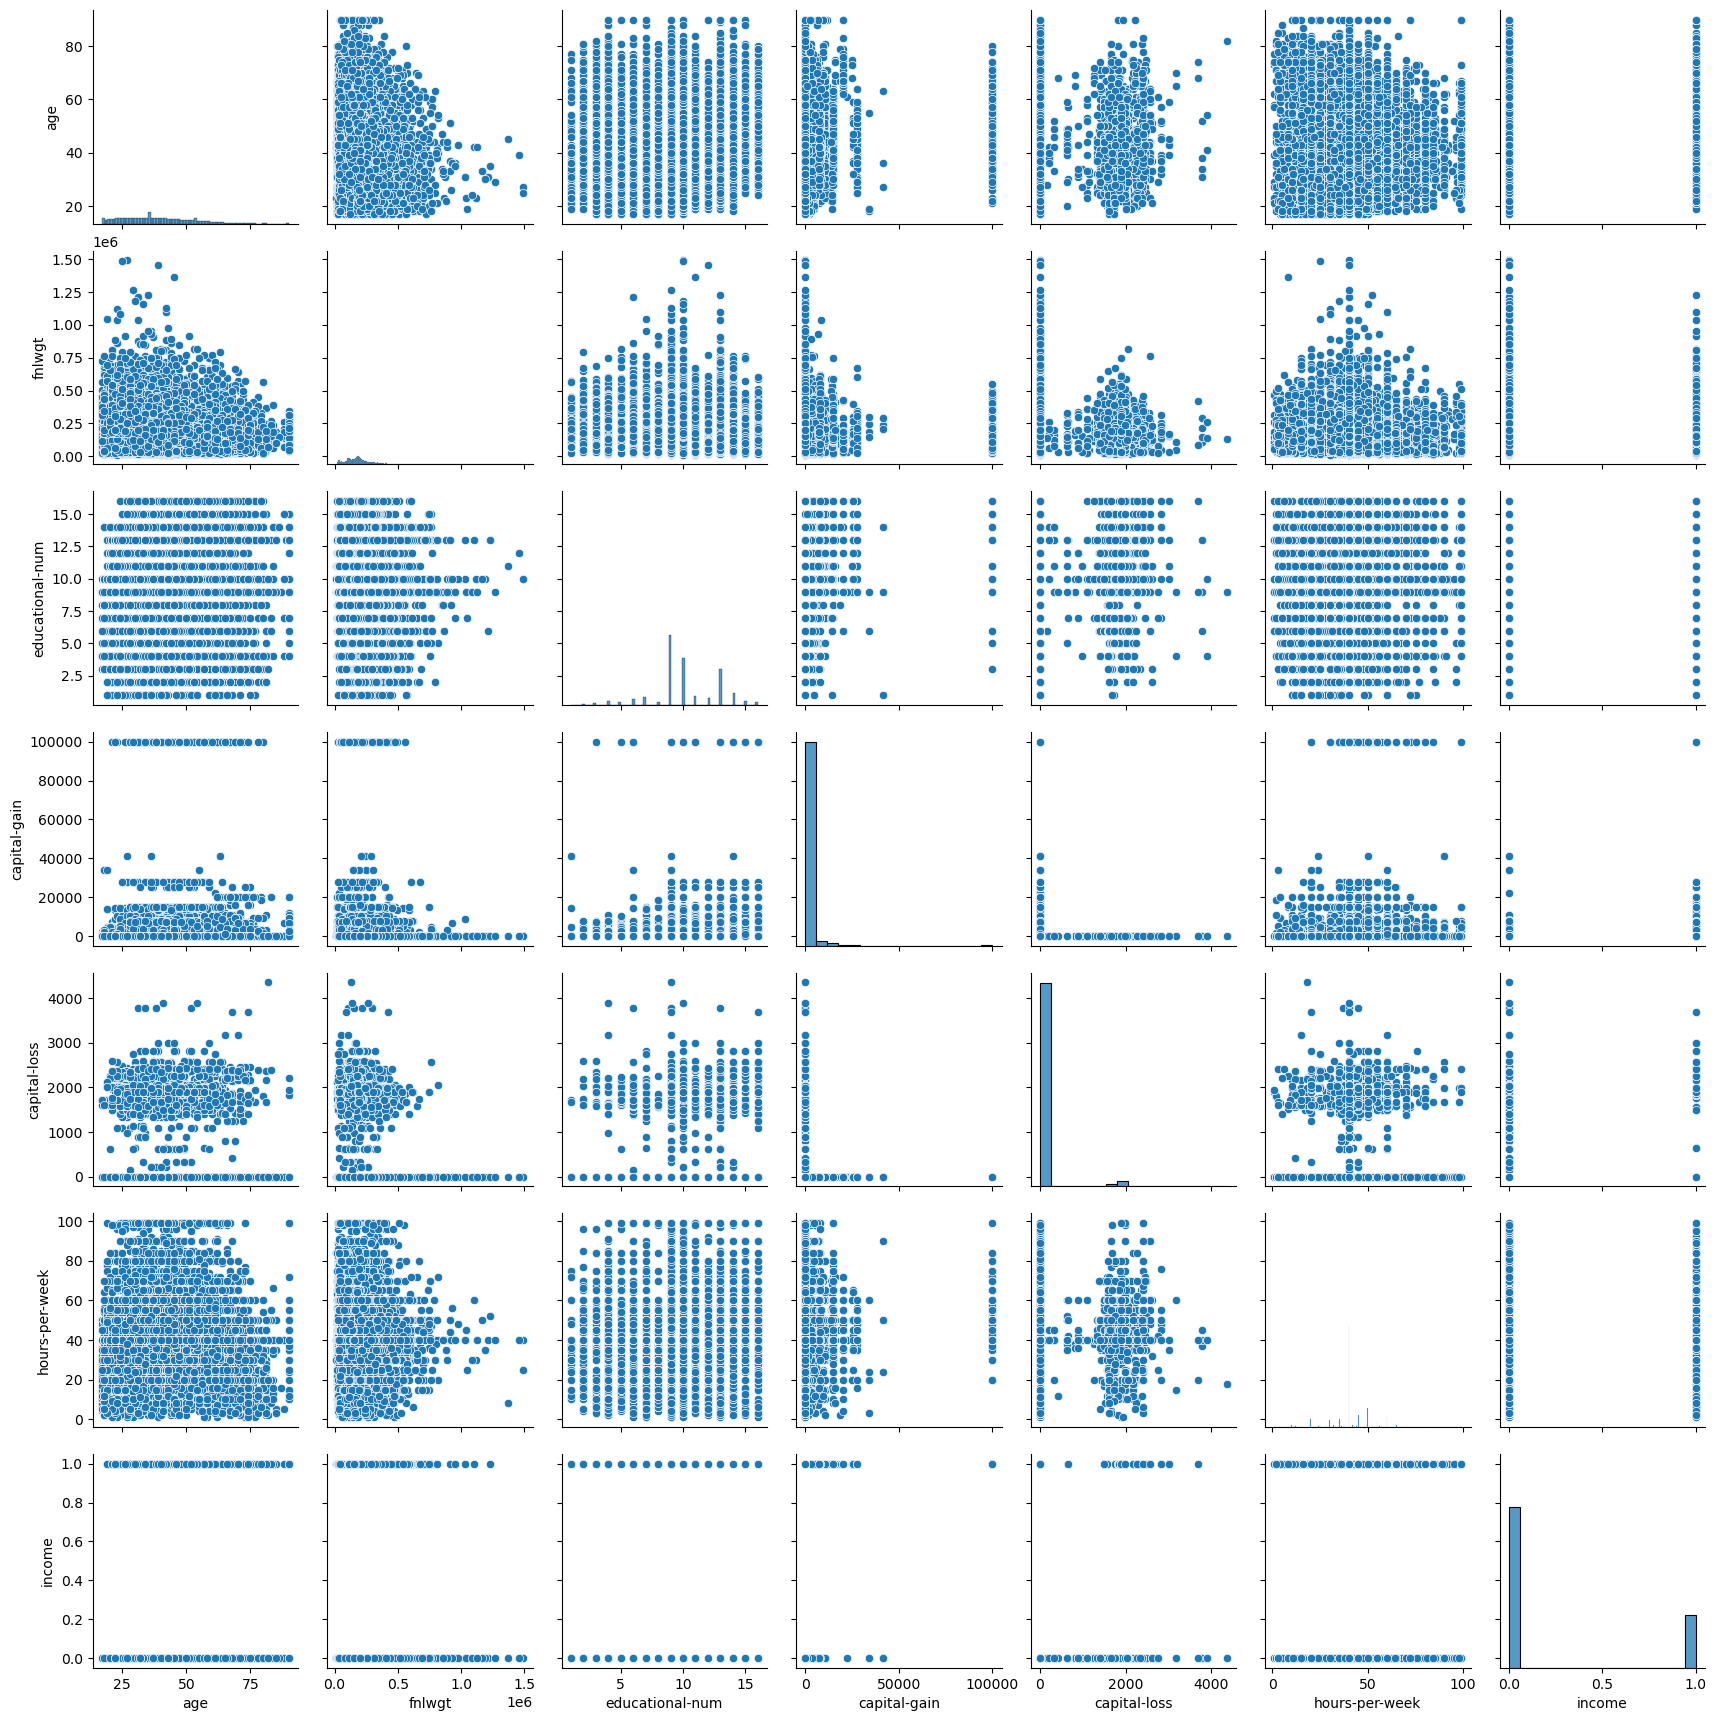

In [14]:
sns.pairplot(df_int)

In [15]:
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(df_int.corr(), dtype=bool))
heatmap = sns.heatmap(df_int.corr(), mask=mask, vmin=-1,vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict = {'fontsize':18}, pad=16);

In [16]:
for column in df_int.columns.to_list():
    if column != 'income':
        sns.displot(x=column, hue='income', data=df_int, kde=True)

In [17]:
for column in df_int.columns.to_list():
    if column != 'income':
        sns.catplot(x='income', y=column, kind='box', data=df)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
y = df_int['income']
X = df_int.drop(columns='income')
column_names = X.columns.values

In [20]:
ss = StandardScaler()

X = ss.fit_transform(X)

In [21]:
X = pd.DataFrame(X)
X.columns = column_names
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942


In [22]:
X = pd.concat([X, df_str], axis=1)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [25]:
y_pred = knn.predict(X_test)

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.8233950025797891

In [28]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [29]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
accuracy_score(y_test,pred)

0.8368836146532026

In [34]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [35]:
plot_confusion_matrix(knn, X_test, y_test)

/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ariefs/anaconda3/envs/ml_knn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10205
           1       0.70      0.60      0.64      3362

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567

